#<font color = blue> Installing Packages</font>

In [ ]:
!pip install nltk
!pip install joblib

#<font color = blue> Importing Libraries</font>

In [ ]:
# NLP
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

# Display results
from prettytable import PrettyTable

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# Plotting libraries
import matplotlib.cm as cm
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# Math
import numpy as np
import pandas as pd

# Random libraries
import warnings
warnings.filterwarnings('ignore')
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#<font color = blue> Data preparation & Text Pre-processing </font> 

<font color = blue> Data reading </font> 

In [ ]:
# Select the significant columns
cols = ['dialect', 'Text']

# File path
file = '/content/drive/MyDrive/Aim Technology/Model/Dialects-with-text-clean.json'

# Read the file
Data = pd.read_json(file, dtype='string')

In [ ]:
# Select the required cols from the previous df
dialects_df = Data[cols]

In [ ]:
# Show a sample from the df
dialects_df.head()

,dialect,Text
0,IQ,لاحول الله والله واحد ميعرف شيكول
1,IQ,لانهم المخططين والمشاركين في الجربمه هم اساس ...
2,IQ,هل مرة من صمصومة ئلبي تفووو عليك اني الغلطان ...
3,IQ,هههههه لا لا هاي قويه بعضلات
4,IQ,الحمد لله سيدنا وانت كيف حالك


In [ ]:
# Null values check
dialects_df.isnull().sum()

dialect    0
Text       0
dtype: int64

In [ ]:
# NA values check
dialects_df.isna().sum()

dialect    0
Text       0
dtype: int64

In [ ]:
# Count of each target class
classes = dialects_df['dialect']
classes.value_counts()

IQ    30000
LY    30000
AE    30000
SD    30000
OM    30000
KW    30000
LB    30000
EG    30000
DZ    30000
YE    30000
SA    30000
MA    30000
JO    30000
TN    30000
SY    30000
PL    30000
QA    30000
BH    30000
Name: dialect, dtype: int64

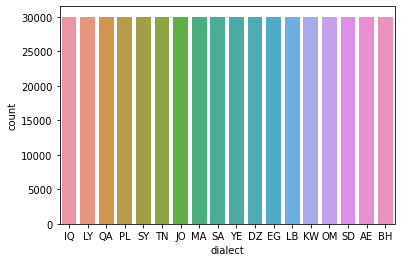

In [ ]:
# Plot each class count
sns.countplot(data= dialects_df, x = "dialect")
plt.show()

<font color = blue> Tokenization </font>

In [ ]:
# Text tokenization
tokenizer = RegexpTokenizer(r'\w+')
dialects_df.loc[:, "Text"] = dialects_df.loc[:, "Text"].apply(tokenizer.tokenize)

In [ ]:
# Show a sample
dialects_df["Text"].head()

0             [لاحول, الله, والله, واحد, ميعرف, شيكول]
1    [لانهم, المخططين, والمشاركين, في, الجربمه, هم,...
2    [هل, مرة, من, صمصومة, ئلبي, تفووو, عليك, اني, ...
3                  [هههههه, لا, لا, هاي, قويه, بعضلات]
4                 [الحمد, لله, سيدنا, وانت, كيف, حالك]
Name: Text, dtype: object

<font color = blue> Stop Words Removal </font>

In [ ]:
# Stop words list
stopwords_list = stopwords.words('arabic')

# Converting the list into single string in order to show it in a more readable format
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 

# Show the stopwords list
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

> > <font color = blue> Count of tokens before stop words removal </font>

In [ ]:
# Text information (before stop words removal)
all_words = [word for tokens in dialects_df["Text"] for word in tokens]
sentences_length = [len(tokens) for tokens in dialects_df["Text"]]

# Get the unique words of the dialects dataset
VOCAB = sorted(list(set(all_words)))

# Print the results summary
print("The total number of words is %s, with a vocabulary size of %s unique words" % (len(all_words), len(VOCAB)))
print("And the max sentence length is %s words" % max(sentences_length))

The total number of words is 7063041, with a vocabulary size of 403917 unique words
And the max sentence length is 87 words


In [ ]:
# top 25 words in dialects (before stop words removal)
counted_words = Counter(all_words)
top_25 = counted_words.most_common(25)

print("The top 25 words are:", end = '\n\n')
top_25

The top 25 words are:



[('من', 114584),
 ('ما', 89064),
 ('في', 84241),
 ('و', 80095),
 ('اللي', 63630),
 ('الله', 59165),
 ('على', 54254),
 ('بس', 50434),
 ('يا', 47897),
 ('كل', 34888),
 ('انا', 34558),
 ('ولا', 29651),
 ('لا', 28691),
 ('والله', 28443),
 ('مش', 27734),
 ('شي', 24996),
 ('لو', 21925),
 ('مع', 21761),
 ('انت', 18738),
 ('ان', 17533),
 ('هذا', 17341),
 ('كان', 17323),
 ('عن', 17106),
 ('ع', 17076),
 ('هو', 15701)]

In [ ]:
# Removing stop words
dialects_df["Text"] = dialects_df["Text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
# Show a sample from the df after tokenization
dialects_df.head()

,dialect,Text
0,IQ,"[لاحول, الله, والله, ميعرف, شيكول]"
1,IQ,"[لانهم, المخططين, والمشاركين, الجربمه, اساس, د..."
2,IQ,"[مرة, صمصومة, ئلبي, تفووو, اني, الغلطان, الي, ..."
3,IQ,"[هههههه, هاي, قويه, بعضلات]"
4,IQ,"[الحمد, لله, سيدنا, وانت, حالك]"


In [ ]:
# Text information
all_words = [word for tokens in dialects_df["Text"] for word in tokens]
sentences_length = [len(tokens) for tokens in dialects_df["Text"]]

# Get the unique words of the dialects dataset
VOCAB = sorted(list(set(all_words)))

# Print the results summary
print("The total number of words is %s, with a vocabulary size of %s unique words" % (len(all_words), len(VOCAB)))
print("And the max sentence length is %s words" % max(sentences_length))

The total number of words is 5861072, with a vocabulary size of 403419 unique words
And the max sentence length is 86 words


In [ ]:
# top 25 words in dialects
counted_words = Counter(all_words)
top_25 = counted_words.most_common(25)
top_25

[('اللي', 63630),
 ('الله', 59165),
 ('انا', 34558),
 ('والله', 28443),
 ('مش', 27734),
 ('شي', 24996),
 ('انت', 18738),
 ('ان', 17533),
 ('يعني', 15688),
 ('الناس', 14672),
 ('مو', 14635),
 ('عشان', 13822),
 ('اذا', 13589),
 ('الي', 13572),
 ('او', 12880),
 ('اي', 11680),
 ('شو', 11302),
 ('يوم', 10902),
 ('علي', 10687),
 ('انه', 10350),
 ('وين', 10219),
 ('ليش', 9870),
 ('الا', 9297),
 ('لازم', 9172),
 ('ربي', 8705)]

The top 25 stop words are: 
['اللي', 'الله', 'انا', 'والله', 'مش', 'شي', 'انت', 'ان', 'يعني', 'الناس', 'مو', 'عشان', 'اذا', 'الي', 'او', 'اي', 'شو', 'يوم', 'علي', 'انه', 'وين', 'ليش', 'الا', 'لازم', 'ربي']


And their counts are: 
[63630, 59165, 34558, 28443, 27734, 24996, 18738, 17533, 15688, 14672, 14635, 13822, 13589, 13572, 12880, 11680, 11302, 10902, 10687, 10350, 10219, 9870, 9297, 9172, 8705]



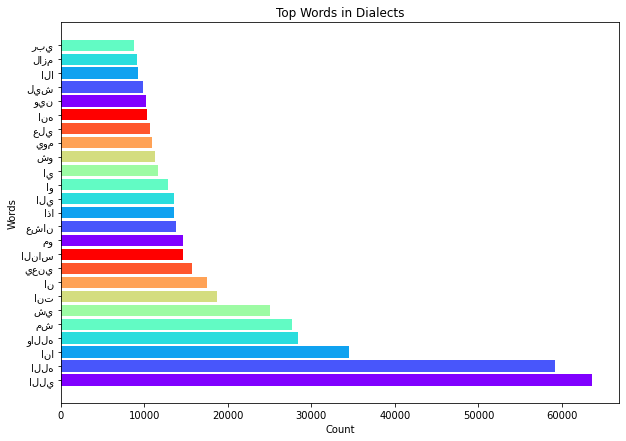

In [ ]:
# Draw the top 25
words = []
counts = []

# Create a separate list for words and counts
for letter, count in top_25:
    words.append(letter)
    counts.append(count)

# Print the words and counts
print("The top 25 stop words are: ", words, sep = '\n')
print("\n\nAnd their counts are: ", counts, sep = '\n', end = '\n\n')


# Plotting words and it's counts
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 7
plt.title('Top Words in Dialects')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors);

<font color = blue> Stemming </font> 

In [ ]:
from nltk.stem.snowball import SnowballStemmer
ar_stemmer = SnowballStemmer("arabic")

# dialects_df["Text"] = dialects_df["Text"].apply(lambda tokens: ar_stemmer.stem(' '.join(tokens)))  

#<font color =blue> Model ML</font>

<font color = blue> Data spletting</font>

In [ ]:
# Make a copy from the tokenized df and convert tokens into sentence
df = dialects_df.copy()

# Convert tokens into sentences
df['Text'] = df['Text'].apply(lambda j: ' '.join(str(token) for token in j))

# Show a sample
df.head()

,dialect,Text
0,IQ,لاحول الله والله ميعرف شيكول
1,IQ,لانهم المخططين والمشاركين الجربمه اساس داعش
2,IQ,مرة صمصومة ئلبي تفووو اني الغلطان الي دا اساير...
3,IQ,هههههه هاي قويه بعضلات
4,IQ,الحمد لله سيدنا وانت حالك


In [ ]:
# Label encoding initializatio
encoder = preprocessing.LabelEncoder()

# Fit into dialects and transform it
df['dialect'] = encoder.fit_transform(df['dialect'])

# Show a sample
df.head()

,dialect,Text
0,4,لاحول الله والله ميعرف شيكول
1,4,لانهم المخططين والمشاركين الجربمه اساس داعش
2,4,مرة صمصومة ئلبي تفووو اني الغلطان الي دا اساير...
3,4,هههههه هاي قويه بعضلات
4,4,الحمد لله سيدنا وانت حالك


In [ ]:
# Split the dataset into X and d
X = df['Text']
y = df['dialect']

In [ ]:

# Spliting Dataset into 80% Training and 20% Testing
all_x_train, all_x_test, all_y_train, all_y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
# Split the training data into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(all_x_train, all_y_train, test_size=0.20, random_state=2)

<font color = blue> Feature extraction using TFIDF</font>

In [ ]:
# Vectorize the Data using tfidfVectorizer

# vectorizer = TfidfVectorizer(max_features=1000,  ngram_range=(1, 3))
vectorizer = TfidfVectorizer(max_features=1000, analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)

# Fit on the training data
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='char_wb', max_df=0.3, max_features=1000, min_df=0.01,
                ngram_range=(3, 5))

In [ ]:
# Transform the training, validation and test data
x_train = vectorizer.transform(x_train)
x_valid = vectorizer.transform(x_valid)
x_test = vectorizer.transform(all_x_test)

<font color = blue> MultinomialNB </font>

In [ ]:
# A function to print the classification report
def print_report(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(accuracy_score(y_test, y_pred)))

In [ ]:
# Fit the MultinomialNB on the data
mnb = MultinomialNB()
mnb.fit(x_train.toarray(), y_train)

# Predict the validating data
prediction = mnb.predict(x_valid.toarray())

# Print the validation accuracy
print("Validation Accuracy: ", accuracy_score(y_valid,prediction))
print("Validation F1Score: ", f1_score(y_valid,prediction, average='macro'))

# Predict the test data
predt_test = mnb.predict(x_test.toarray())

# Calculating test accuracy 
mnb_acc = accuracy_score(all_y_test, predt_test)
mnb_f1 = f1_score(all_y_test,predt_test, average='macro')

# Print the test accuracy
print("Test Accuracy: ", mnb_acc)
print("Test F1Score: ", mnb_f1)

Validation Accuracy:  0.2784490740740741
Validation F1Score:  0.26736837738080427
Test Accuracy:  0.28162037037037035
Test F1Score:  0.2708174818280942


<font color = blue>LogisticRegression </font> 

In [ ]:
# Fit the LogisticRegression on the data
LR= LogisticRegression(penalty = 'l2', C = 1)
LR.fit(x_train.toarray(), y_train)

# Predict the validating data
prediction = LR.predict(x_valid.toarray())

# Print the validation accuracy
print("Validation Accuracy: ", accuracy_score(y_valid,prediction))
print("Validation F1Score: ", f1_score(y_valid,prediction, average='macro'))

# Predict the test data
predt_test = LR.predict(x_test.toarray())

# Print the test accuracy
print("Test Accuracy: ", accuracy_score(all_y_test, predt_test))
print("Test F1Score: ", f1_score(all_y_test,predt_test, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation Accuracy:  0.3467013888888889
Validation F1Score:  0.34175676352541834
Test Accuracy:  0.3460740740740741
Test F1Score:  0.3417324923668809


In [ ]:
# Fit the LogisticRegression on the SCALED data
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train.todense(), y_train)  # apply scaling on training data

# pipe.score(x_valid.todense(), y_valid)

# Predict the validating data
prediction = pipe.predict(x_valid.todense())

# Print the validation accuracy
print("Validation Accuracy: ", accuracy_score(y_valid,prediction))
print("Validation F1Score: ", f1_score(y_valid,prediction, average='macro'))

# Predict the test data
predt_test = pipe.predict(x_test.todense())

# Calculating test accuracy 
lr_acc = accuracy_score(all_y_test, predt_test)
lr_f1 = f1_score(all_y_test,predt_test, average='macro')

# Print the test accuracy
print("Test Accuracy: ", lr_acc)
print("Test F1Score: ", lr_f1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

Validation Accuracy:  0.35181712962962963
Validation F1Score:  0.34707779165594005


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Test Accuracy:  0.3524814814814815
Test F1Score:  0.34805348745702136


<font color = blue> DecisionTreeClassifier </font>

In [ ]:
# Fit the DecisionTreeClassifier on the data
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train.toarray(), y_train)

# Predict the validating data
prediction = classifier.predict(x_valid.toarray())

# Print the validation accuracy
print("Validation Accuracy: ", accuracy_score(y_valid,prediction))
print("Validation F1Score: ", f1_score(y_valid,prediction, average='macro'))

# Predict the test data
predt_test = classifier.predict(x_test.toarray())

# Calculating test accuracy 
tree_acc = accuracy_score(all_y_test, predt_test)
tree_f1 = f1_score(all_y_test,predt_test, average='macro')

# Print the test accuracy
print("Test Accuracy: ", tree_acc)
print("Test F1Score: ", tree_f1)

Validation Accuracy:  0.6519212962962962
Validation F1Score:  0.6476335015475178
Test Accuracy:  0.6520277777777778
Test F1Score:  0.6476872962476272


In [ ]:
# Print the classification report of the decision tree
print_report(classifier, x_test.toarray(), all_y_test)

              precision    recall  f1-score   support

           0       0.58      0.56      0.57      6049
           1       0.59      0.58      0.58      5941
           2       0.72      0.75      0.73      6031
           3       0.58      0.51      0.54      6038
           4       0.71      0.77      0.74      5937
           5       0.58      0.55      0.56      6050
           6       0.52      0.45      0.48      6101
           7       0.65      0.63      0.64      6014
           8       0.58      0.53      0.55      5976
           9       0.80      0.86      0.83      6053
          10       0.64      0.67      0.66      5929
          11       0.51      0.45      0.48      6048
          12       0.56      0.54      0.55      5851
          13       0.59      0.58      0.59      6036
          14       0.74      0.81      0.77      5912
          15       0.70      0.73      0.72      6070
          16       0.80      0.90      0.85      5942
          17       0.76    

<font color = blue> Comparing results </font>

In [ ]:
# Comparison of all algorithms Results
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]


x.add_row(["MultinomialNB Algorithm", round(mnb_f1,2)])
x.add_row(["LogesticRegression Algorithm",  round(lr_f1,2)])
x.add_row(["DecisionTree Algorithm", round(tree_f1,2)])

print(x)

<font color = blue> As we see, the decision tree classifier is the best. so we will train the whole data using it</font>

In [ ]:
# vectorizer = TfidfVectorizer(max_features=1000,  ngram_range=(1, 3))
vectorizer = TfidfVectorizer(max_features=1000, analyzer='char_wb', ngram_range=(3, 5), min_df=.01, max_df=.3)

# Fit on the whole train data
vectorizer.fit(all_x_train)

# Transform the whole data
all_x_train = vectorizer.transform(all_x_train)
all_x_test = vectorizer.transform(all_x_test)

In [ ]:
# Fit the DecisionTreeClassifier on the data
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(all_x_train.toarray(), all_y_train)

# Predict the test data
predt_test = classifier.predict(all_x_test.toarray())

# Calculating test accuracy 
tree_acc = accuracy_score(all_y_test, predt_test)
tree_f1 = f1_score(all_y_test,predt_test, average='macro')

# Print the test accuracy
print("Test Accuracy: ", tree_acc)
print("Test F1Score: ", tree_f1)

Test Accuracy:  0.7141481481481482
Test F1Score:  0.7102143011239614


<font color = blue> Saving the model</font>

In [ ]:
# Save the model as a pickle in a file
# files path
path = '/content/drive/MyDrive/Aim Technology/Model'

# Files saving
joblib.dump(classifier, path + '/decisionTree.pkl')
joblib.dump(vectorizer, path + '/TFIDF.pkl')
joblib.dump(encoder, path + '/labelIncoder.pkl')

# Load the model from the file
model_from_joblib = joblib.load('decisionTree.pkl')
vect_from_joblib = joblib.load('TFIDF.pkl')
label_from_joblib = joblib.load('labelIncoder.pkl')


# Make prediction check
# Text samples
test_text = np.array('دير بالك عحالك')
# test_text = np.array('شلون تسوي انت  !! انت مينون')
# test_text = np.array('	الحمد لله سيدنا وانت حالك')
# test_text = np.array('ههههه هاي قوية بعضلات')
# test_text = np.array('كيفك شو الاخبار حبيبي')
# test_text = np.array('كيفك شو الاخبار ')
# test_text = np.array('ازيك عامل ايه')
# test_text = np.array('ازيك عامل ايه واحشني)
# test_text = np.array('ازيك عامل ايه يابني')
# test_text = np.array('فينك يا شبح')
# test_text = np.array('وينك شو الاخبار')
# test_text = np.array('كابتن اسلام !! فينك يا عم ماحدش بيشوفك ليه؟!!')
# test_text = np.array('حمد الله علي سلامتك يا فمر')


# Convert text into series
test_text_series = pd.Series(test_text, index=[0])

# TFIDF transformation
transformed_test_text = vect_from_joblib.transform(test_text_series)

# Predict
predicted_label= model_from_joblib.predict(transformed_test_text)

# Print the predicted label
label_from_joblib.classes_[predicted_label]

['/content/drive/MyDrive/Aim Technology/Model/labelIncoder.pkl']

<font color = blue> Save the df</font> 

In [ ]:
# Reset the index, in order to be allowed for saving
df.reset_index(inplace=True)

# Save the data in a file
dir = '/content/drive/MyDrive/Aim Technology/Model'
df.to_json(dir + '/DL-data-ready.json', index = True)